# An Example on Sentiment Analysis

## Important Concepts

### Text Normalization
Is the process of cleaning, normalizing, and standardizing textual data with techniques like removing special symbols and characters, removing extraneous HTML tags, removing stopwords, correcting spellings.

### Feature Extraction
Is a process whereby we extract meaningful features or attributes from raw textual data for feeding it into a statistical or ML algorithm. We do this because conventional algorithms work on numerical vectors and cannot work directly on raw text data.

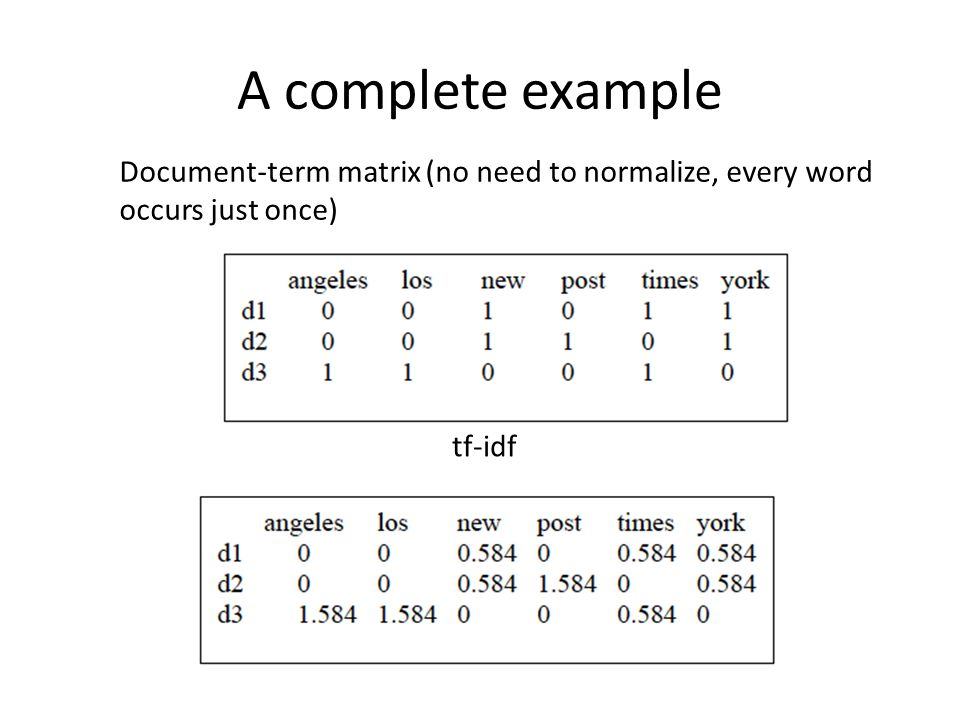

In [46]:
 
Image(filename='tfidf.jpg') 

### Confussion Matrix

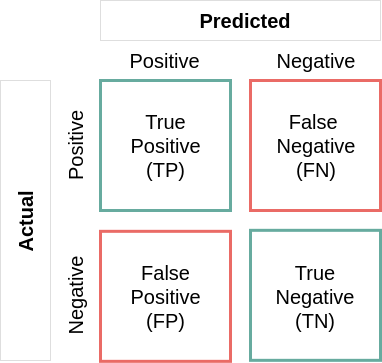

In [55]:
Image(filename='ConfussionMatrix.png') 

### An example ...

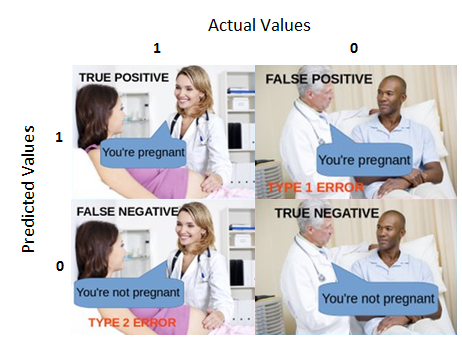

In [45]:
Image(filename='ExampleConfussionMatrix.png') 

### True Positive:

**Interpretation:** You predicted positive and it’s true.

You predicted that a woman is pregnant and she actually is.

### True Negative:

**Interpretation:** You predicted negative and it’s true.

You predicted that a man is not pregnant and he actually is not.

### False Positive: (Type 1 Error)

**Interpretation:** You predicted positive and it’s false.

You predicted that a man is pregnant but he actually is not.

### False Negative: (Type 2 Error)

**Interpretation:** You predicted negative and it’s false.

You predicted that a woman is not pregnant but she actually is.

*Just Remember, We describe predicted values as Positive and Negative and actual values as True and False.*

### Some metrics

**Recall:** De todas las etiquetas positivas posibles, ¿cuántas identificó correctamente el modelo?
$$Recall = \frac{TP}{TP + FN}$$

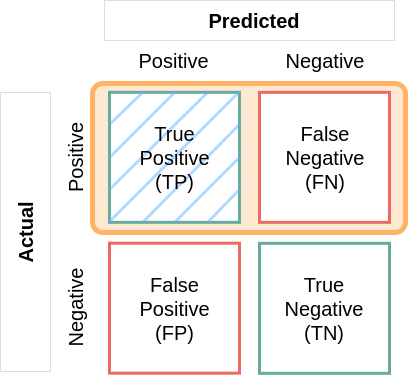

In [51]:
Image(filename='Recall.png') 

**Precision:** identifica la frecuencia con la que un modelo predijo correctamente la clase positiva.
$$Precision = \frac{TP}{TP + FP}$$

*¿Qué tan seguido acierta?*

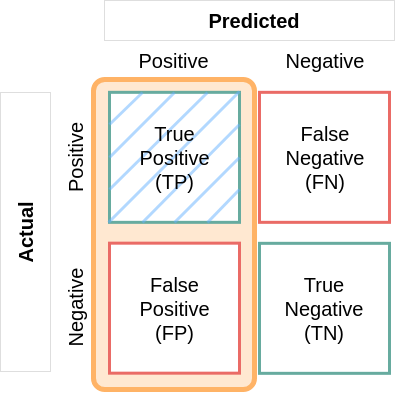

In [52]:
Image(filename='Precision.png') 

**Accuracy:** Número de predicciones correctas del total de predicciones
$$Accuracy = \frac{TP+TN}{TP + TN + FP + FN}$$

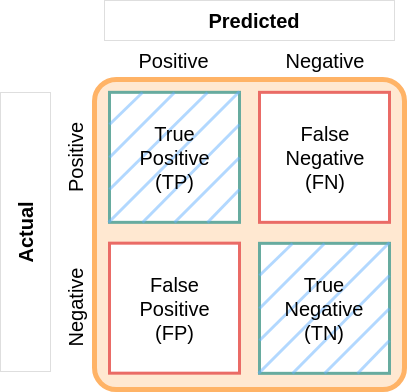

In [53]:
Image(filename='Accuracy.png') 

## Feature Extraction

In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def build_feature_matrix(documents, feature_type='frequency', ngram_range=(1,1), min_df=0.0, max_df=1.0):
    feature_type = feature_type.lower().strip()
    
    if feature_type == 'binary':
        vectorizer = CountVectorizer(binary=True, min_df=min_df, max_df=max_df, ngram_range=ngram_range)
        
    elif feature_type == 'frequency':
        vectorizer = CountVectorizer(binary=False, min_df=min_df, max_df=max_df, ngram_range=ngram_range)
    
    elif feature_type == 'tfidf':
        vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df, ngram_range=ngram_range)
    
    else:
        raise Exception("Wrong feature type entered. Possible values: 'binary', 'frequency', 'tfidf'")
    
    feature_matrix = vectorizer.fit_transform(documents).astype(float)
    return vectorizer, feature_matrix

## Model Performance Evaluation

Paquetes más utilizados para obtener métricas en la evaluación de un modelo

In [57]:
from sklearn import metrics
import numpy as np
import pandas as pd

Creamos una función para obtener las métricas más comunes en la evaluación de un modelo:
- accuracy
- precision
- recall

In [15]:
def display_evaluation_metrics(true_labels, predicted_labels, positive_class=1):
    # Displaying Accuracy
    accuracy = metrics.accuracy_score(true_labels, predicted_labels)
    print('Accuracy: ', np.round(accuracy, 2))
    
    # Displaying Precision
    precision = metrics.precision_score(true_labels, 
                                        predicted_labels, 
                                        pos_label=positive_class,
                                       average='binary')
    print('Precision: ', np.round(precision, 2))
    
    # Displaying Recall
    recall = metrics.recall_score(true_labels, 
                                  predicted_labels, 
                                  pos_label=positive_class, 
                                  average='binary')
    print('Recall: ', np.round(recall, 2))

### Matriz de confusión
Ahora creamos una función que nos ayude a crear una matriz de confusión

In [58]:
def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    cm = metrics.confusion_matrix(y_true=true_labels,
                                  y_pred=predicted_labels,
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm,
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=[[0,0], [0, 1]]),
                                                  index=pd.MultiIndex(levels=[['Actual:'], classes],
                                                  labels=[[0,0], [0, 1]]))
    print(cm_frame)

### Function to make a report for all metrics

In [59]:
def display_classification_report(true_labels, predicted_labels, classes=[1, 0]):
    report = metrics.classification_report(y_true=true_labels,
                                           y_pred=predicted_labels)
    print(report)

## Preparing Datasets

In [18]:
import pandas as pd
import numpy as np

### Read dataset

In [60]:
dataset = pd.read_csv('movie_reviews.csv')
dataset.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

### Split dataset on training and testing datasets

In [21]:
train_data = dataset[:35000]
test_data = dataset[35000:]

In [24]:
train_reviews = np.array(train_data['review'])
train_sentiments = np.array(train_data['sentiment'])

test_reviews = np.array(test_data['review'])
test_sentiments = np.array(test_data['sentiment'])

### Prepare sample dataset for experiments

In [25]:
sample_docs = [100, 5817, 7356, 1008, 7155, 3533, 13010]
sample_data = [(test_reviews[index], test_sentiments[index]) 
                   for index in sample_docs]

## General workflow on Text Classification

### 1. Model training
- Normalize training data
- Extract features and build feature set and feature vectorizer
- Use supervised learning algorithm (SVM) to build a predictive model

### 2. Model testing
- Normalize testing data
- Extract features using training feature vectorizer
- Predict the sentiment for testing reviews using training model
- Evaluate model performance

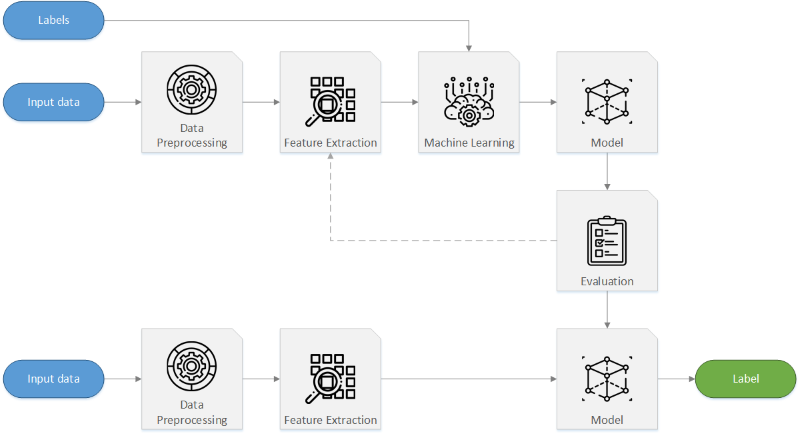

In [56]:
Image(filename='Process_Text_Classification.png') 

## Model Training

#### 1. Normalize training data

In [27]:
from normalization import normalize_corpus

norm_train_reviews = normalize_corpus(train_reviews, lemmatize=True, only_text_chars=True)

#### 2. Feature extraction

In [28]:
vectorizer, train_features = build_feature_matrix(documents=norm_train_reviews,
                                                  feature_type='tfidf',
                                                  ngram_range=(1,1),
                                                  min_df=0.0, max_df=1.0)

#### 3. Build the model

In [30]:
from sklearn.linear_model import SGDClassifier

svm = SGDClassifier(loss='hinge', max_iter=200)
svm.fit(train_features, train_sentiments)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=200,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

### Model Testing

#### 1. Normalize reviews

In [31]:
norm_test_reviews = normalize_corpus(test_reviews, lemmatize=True, only_text_chars=True)


#### 2. Extract features

In [32]:
test_features = vectorizer.transform(norm_test_reviews)

This are our sample docs extracted earlier

In [33]:
for doc_index in sample_docs:
    print('Review:')
    print(test_reviews[doc_index])
    print('Actual Labeled Sentiment:', test_sentiments[doc_index])
    doc_features = test_features[doc_index]
    predicted_sentiment = svm.predict(doc_features)[0]
    print('Predicted Sentiment:', predicted_sentiment)
    print()

Review:
Worst movie, (with the best reviews given it) I've ever seen. Over the top dialog, acting, and direction. more slasher flick than thriller.With all the great reviews this movie got I'm appalled that it turned out so silly. shame on you martin scorsese
Actual Labeled Sentiment: negative
Predicted Sentiment: negative

Review:
I hope this group of film-makers never re-unites.
Actual Labeled Sentiment: negative
Predicted Sentiment: negative

Review:
Add this little gem to your list of holiday regulars. It is<br /><br />sweet, funny, and endearing
Actual Labeled Sentiment: positive
Predicted Sentiment: positive

Review:
a mesmerizing film that certainly keeps your attention... Ben Daniels is fascinating (and courageous) to watch.
Actual Labeled Sentiment: positive
Predicted Sentiment: positive

Review:
This movie is perfect for all the romantics in the world. John Ritter has never been better and has the best line in the movie! "Sam" hits close to home, is lovely to look at and so m

#### the overlap of positive and negative emotions makes difficult for the model to predict the actual sentiment!

#### 3. Predict the sentiment for testing reviews using training model

In [34]:
predicted_sentiments = svm.predict(test_features)

#### 4. Evaluate model performance

In [36]:
display_evaluation_metrics(true_labels=test_sentiments, 
                           predicted_labels=predicted_sentiments,
                           positive_class='positive')

Accuracy:  0.89
Precision:  0.88
Recall:  0.9


Show confussion matrix

In [37]:
display_confusion_matrix(true_labels=test_sentiments, 
                         predicted_labels=predicted_sentiments,
                         classes=['positive', 'negative'])

                 Predicted:         
                   positive negative
Actual: positive       6759      751
        negative        923     6567


Show detailed per-class classification report

In [38]:
display_classification_report(true_labels=test_sentiments,
                              predicted_labels=predicted_sentiments,
                              classes=['positive', 'negative'])

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      7490
    positive       0.88      0.90      0.89      7510

   micro avg       0.89      0.89      0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000

